<a href="https://colab.research.google.com/github/Bang-seok/kt_data_classification/blob/main/Decisiontree_SKT_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Univ Traffic 데이터 세트 전처리**

In [ ]:
#코드 공부
#https://todayisbetterthanyesterday.tistory.com/38

In [ ]:
import pandas as pd
import os
import numpy as np
import random

traingrid = 108 #train data 개수 설정

#총 136개 : 주거 1~49, 상업 50~113, 학교 114~126, 나머지 127~136
#read_csv 관련 글 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SKT/SKT ALL.csv', header = None)

In [ ]:
raw_data

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,1113479,534316,2099045,1621451,392712,525627,373430,519539,474531,1290878,...,598955,291117,974167,868381,1764992,2855723,99472,202536,90904,274980
1,255098,570019,1589148,1204529,138939,83623,217198,347486,232401,976633,...,759479,192672,759554,326057,1315143,3099892,120866,151324,37213,286566
2,250412,249285,1201073,945433,129990,57770,156969,152544,259278,592549,...,422001,209806,1699280,188344,1768066,1991795,70128,104012,18278,212757
3,280946,155383,828618,364065,55166,65491,92522,99348,294699,433679,...,260811,219330,881707,179176,610428,970755,104827,110830,31477,106052
4,165596,209632,624726,340909,370576,122660,92453,159266,135452,360603,...,395922,170233,544501,68226,412736,430698,36188,101740,21237,92208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,1169078,2343531,2233431,2263015,914079,599599,1781006,972537,1132735,2411080,...,377502,278721,1184006,1687126,2799532,1401992,445969,743535,88514,620207
740,732434,989735,1641929,2115799,646118,494493,551722,599804,743343,2044824,...,351685,294032,1168086,1251596,2334418,1665165,416874,715912,76319,677058
741,560655,1003354,1582691,2149314,576212,423768,659259,898187,627219,1894645,...,319352,161876,1904988,521328,2631925,2096748,327733,714104,72718,422427
742,477384,1280852,1537695,1533691,478797,385725,773664,584034,655721,1336142,...,191912,126199,1486296,223419,2428468,2459658,252119,831231,38735,323453


In [ ]:
#결측치(보간법으로 데이터를 채워넣었다)
total_count = 0;
for i in range(len(raw_data.columns)):
    count = 0
    #print("----------------", i + 1, "번째 기지국-----------------")
    for j in range(len(raw_data[0])):
        if raw_data[i][j] == 0:
            raw_data[i][j] = (raw_data[i][j-1] + raw_data[i][j+1]) / 2
            #print("변경된 값: ", Data[i][j-1], Data[i][j], Data[i][j+1])
            count = count + 1
            total_count = total_count + 1
    #print(i, "번째 기지국 결측치 개수: ", count)

#print(i, "데이터 결측치 개수: ", count)

In [ ]:
Apartment = [4,11,15,21,133,134,135,136]

In [ ]:
from statsmodels.tsa.seasonal import STL


data_deresidual = pd.DataFrame()

for i in range(len(raw_data.columns)):
    decomposition = STL(raw_data[i], period = 24) # 시계열 분해, decompostion
    res=decomposition.fit()
    data_deresidual[i] = raw_data[i] - res.resid

<ipython-input-8-eef892608118>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_deresidual[i] = raw_data[i] - res.resid


In [ ]:
# data = raw_data[:][:24*7].copy(deep = True)
data = data_deresidual[:][:24*7].copy(deep = True)

In [ ]:
# 참조 코드
# https://www.delftstack.com/ko/howto/python-pandas/how-to-add-new-column-to-existing-dataframe-in-python-pandas/
#아파트 데이터 추가(8월 8일(토)~8월 14일(금), 8월 22일(토)~8월 28일(금))
for i in range(len(Apartment)):
    index2 = Apartment[i] - 1
    for j in [1,2]:
        index1 = 135 + i*2 + j
        if j == 1:
            start = 24*7*j
            end = 24*7*(j+1)
        else: #8월 15~21일 데이터를 쓸 수 없기 때문에 8월 22~28일 데이터로 넘어가느라 사용되는 코드
            start = 24*7*(j+1)
            end = 24*7*(j+2)
        a = list(raw_data[index2][start:end].copy(deep = True))
        data.loc[:, index1] = a


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,1.010780e+06,459747.659650,2.035119e+06,1.538184e+06,5.270782e+05,397266.534370,338879.607641,307519.370333,4.571854e+05,1.328883e+06,...,486918,517872,185203,78413,287343,745101,270799,115468,139766,128339
1,3.343430e+05,555656.346329,1.560985e+06,1.239296e+06,3.611920e+05,-20167.920843,205697.381243,450646.917523,3.995213e+05,9.393220e+05,...,426202,435453,231959,61594,208629,253415,80331,50888,80097,92138
2,2.726741e+05,400703.391978,1.265680e+06,9.006533e+05,3.470433e+05,-17731.676966,148758.241269,276840.640320,3.584085e+05,6.422539e+05,...,285792,600690,205480,51023,157460,135091,58819,79633,67162,100297
3,3.119719e+05,216797.360959,9.023970e+05,3.188221e+05,2.659664e+05,-25170.797799,129816.857356,260563.551551,3.645076e+05,5.343704e+05,...,281800,291456,200573,36538,99331,65158,82599,82589,193882,26285
4,2.409522e+05,192387.480570,8.449917e+05,5.961940e+05,3.548079e+05,15635.611191,93442.397475,266624.026653,2.520159e+05,4.423684e+05,...,193506,365773,164485,38999,76508,74383,30452,75455,38742,43615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2.472369e+06,895330.035459,2.522603e+06,1.990726e+06,2.071599e+06,465145.179011,534879.261219,988271.468750,1.125936e+06,2.414124e+06,...,527140,614443,557712,583477,822203,498587,55680,40619,253980,286338
164,2.201828e+06,873509.918156,2.427583e+06,1.711078e+06,1.918061e+06,457347.574790,639678.430274,809533.842398,1.091446e+06,2.138095e+06,...,554046,588558,559400,471307,613988,671882,40442,69482,283299,207007
165,1.782038e+06,857272.518801,2.384599e+06,1.464729e+06,1.844061e+06,463912.110903,579141.205564,695193.175266,9.731661e+05,1.616168e+06,...,611652,716033,493666,429645,460268,620885,151457,43060,356454,879240
166,1.068503e+06,753602.186508,2.101762e+06,1.516615e+06,1.143786e+06,447009.980736,702148.109808,691699.662624,8.388255e+05,1.606977e+06,...,881324,1103586,873926,367554,558034,858347,101530,38551,388250,938711


In [ ]:
#데이터 Normalize
from sklearn.preprocessing import MinMaxScaler
for i in range(len(data.columns)):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaler.fit(pd.DataFrame(data[i]))
    data[i] = scaler.transform(pd.DataFrame(data[i]))

In [ ]:
data_t = data.transpose() #행열 transpose
data_t['id'] = range(1, len(data_t) + 1)
data_t.set_index('id', inplace=True) #id를 index로 사용

data_t

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
id,,,,,,,,,,,,,,,,,,,,,
1,0.401632,0.124702,0.099455,0.115544,0.086469,0.071747,0.062447,0.074201,0.124746,0.230905,...,0.749083,0.723607,0.760745,0.737649,0.960489,1.000000,0.889242,0.717382,0.425264,0.244054
2,0.280324,0.353001,0.235582,0.096222,0.077725,0.082130,0.066424,0.100175,0.214627,0.130506,...,0.606589,0.642920,0.684339,0.778432,0.596725,0.610398,0.593863,0.581559,0.503000,0.583282
3,0.522558,0.387528,0.303428,0.199967,0.183619,0.168206,0.140421,0.189605,0.227186,0.282613,...,0.657491,0.771809,0.811558,0.710398,0.787673,0.661389,0.634328,0.622087,0.541537,0.696900
4,0.671793,0.521725,0.351697,0.059567,0.198832,0.120347,0.101578,0.240650,0.384832,0.448227,...,0.663079,0.706537,0.770996,0.797790,0.891974,0.899009,0.758601,0.634913,0.660964,0.680463
5,0.215347,0.163814,0.159419,0.134232,0.161831,0.124032,0.109454,0.102616,0.119498,0.178422,...,0.595692,0.585864,0.580703,0.589260,0.646895,0.695159,0.647461,0.624473,0.406930,0.320953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.333713,0.102684,0.047088,0.014228,0.018563,0.019508,0.017500,0.239186,0.119075,0.297024,...,0.266980,0.352009,0.356834,0.351093,0.300167,0.217883,0.299310,0.275348,0.386924,0.083653
149,0.270280,0.073832,0.051645,0.076172,0.022387,0.049393,0.080046,0.016588,0.010581,0.000000,...,0.020941,0.015991,0.027379,0.044763,0.025767,0.048408,0.032691,0.147192,0.095697,0.101111
150,0.304614,0.122657,0.203647,0.211976,0.191875,0.134969,0.083016,0.000000,0.084236,0.101325,...,0.086251,0.119760,0.110380,0.243482,0.191785,0.093723,0.175046,0.100601,0.087896,0.280068


In [ ]:
#총 136개 : 주거 1~49, 상업 50~113, 학교 114~126, 나머지 127~136 아파트 섞여있음
#주거: residential area, 상업: commercial area, 학교: school, 나머지: etc
Apartment.extend(range(137, 153))
Residential = list(range(1,50))
Commercial = list(range(50, 114))
School = list(range(114, 127))

for i in Apartment: #주거지역 데이터에서 Apartment 데이터 제거 49개 데이터 -> 45개 데이터
    if i in Residential:
        Residential.remove(i)
    else:
        break

target = Apartment

In [ ]:
data_t['SpecificArea'] = data_t.index.isin(target) #Data의 index 중 Apartment에 속하는 index를 true로 반환.

In [ ]:
data_t #SpecificArea가 추가되어서 열이 하나 늘었다.

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,SpecificArea
id,,,,,,,,,,,,,,,,,,,,,
1,0.401632,0.124702,0.099455,0.115544,0.086469,0.071747,0.062447,0.074201,0.124746,0.230905,...,0.723607,0.760745,0.737649,0.960489,1.000000,0.889242,0.717382,0.425264,0.244054,False
2,0.280324,0.353001,0.235582,0.096222,0.077725,0.082130,0.066424,0.100175,0.214627,0.130506,...,0.642920,0.684339,0.778432,0.596725,0.610398,0.593863,0.581559,0.503000,0.583282,False
3,0.522558,0.387528,0.303428,0.199967,0.183619,0.168206,0.140421,0.189605,0.227186,0.282613,...,0.771809,0.811558,0.710398,0.787673,0.661389,0.634328,0.622087,0.541537,0.696900,False
4,0.671793,0.521725,0.351697,0.059567,0.198832,0.120347,0.101578,0.240650,0.384832,0.448227,...,0.706537,0.770996,0.797790,0.891974,0.899009,0.758601,0.634913,0.660964,0.680463,True
5,0.215347,0.163814,0.159419,0.134232,0.161831,0.124032,0.109454,0.102616,0.119498,0.178422,...,0.585864,0.580703,0.589260,0.646895,0.695159,0.647461,0.624473,0.406930,0.320953,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.333713,0.102684,0.047088,0.014228,0.018563,0.019508,0.017500,0.239186,0.119075,0.297024,...,0.352009,0.356834,0.351093,0.300167,0.217883,0.299310,0.275348,0.386924,0.083653,True
149,0.270280,0.073832,0.051645,0.076172,0.022387,0.049393,0.080046,0.016588,0.010581,0.000000,...,0.015991,0.027379,0.044763,0.025767,0.048408,0.032691,0.147192,0.095697,0.101111,True
150,0.304614,0.122657,0.203647,0.211976,0.191875,0.134969,0.083016,0.000000,0.084236,0.101325,...,0.119760,0.110380,0.243482,0.191785,0.093723,0.175046,0.100601,0.087896,0.280068,True


In [ ]:
import random

check = False
sample_num = int(len(data_t)*0.8)
target_num = len(target)
while (check == False):
    random_num = random.randrange(1,100000)
    train = data_t.sample(sample_num, replace=False, random_state=random_num) #원래는 random_state=2022 20프로를 train_data로 분류
    test = data_t.loc[ ~data_t.index.isin(train.index)]
    train_target_num = train['SpecificArea'].sum()
    if ((train_target_num >= int(0.7*target_num)) & (train_target_num <= int(0.8*target_num))):
        check = True

In [ ]:
num = (train['SpecificArea']).sum()
print("------train 데이터--------")
print("Indoor 기지국 개수: " , num)
print("전체 기지국 개수: ", len(train))

------train 데이터--------
Indoor 기지국 개수:  19
전체 기지국 개수:  121


In [ ]:
#DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://inuplace.tistory.com/m/548

from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth = 4) #min_samples_split값 중요 초기값: min_samples_split = 2

In [ ]:
time = []
for i in range(24*7):
    time.append(i)

classifier.fit(train[time], train['SpecificArea'])

DecisionTreeClassifier(max_depth=4)

In [ ]:
predictions = classifier.predict(test[time])

In [ ]:
test['pred'] = predictions

<ipython-input-22-c6f65a2c660d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = predictions


In [ ]:
#test 데이터
print("------test 데이터--------")
print("전체 기지국 개수: ", len(test))
num = (test['SpecificArea']).sum()
print("Specific 기지국 개수: " , num)

#test 데이터 분류 결과
print("\n------test 데이터 분류 결과--------")
print("test 데이터 중 잘못 분류한 경우: ", (test['SpecificArea'] != test['pred']).sum())
Indoor_false = 0
for i in test.index:
    if test['SpecificArea'][i] and test['pred'][i] == False:
        Indoor_false = Indoor_false + 1

print("Indoor 데이터 중 잘못 분류한 경우: ", Indoor_false)
print("분류 정확도: ",(test['pred'] == test['SpecificArea']).mean())

------test 데이터--------
전체 기지국 개수:  31
Specific 기지국 개수:  5

------test 데이터 분류 결과--------
test 데이터 중 잘못 분류한 경우:  3
Indoor 데이터 중 잘못 분류한 경우:  3
분류 정확도:  0.9032258064516129


모델 시각화하고 해석

In [ ]:
import matplotlib.pyplot as plt

# 그래프, 도표 크기를 크게 보고 싶을 때
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 10

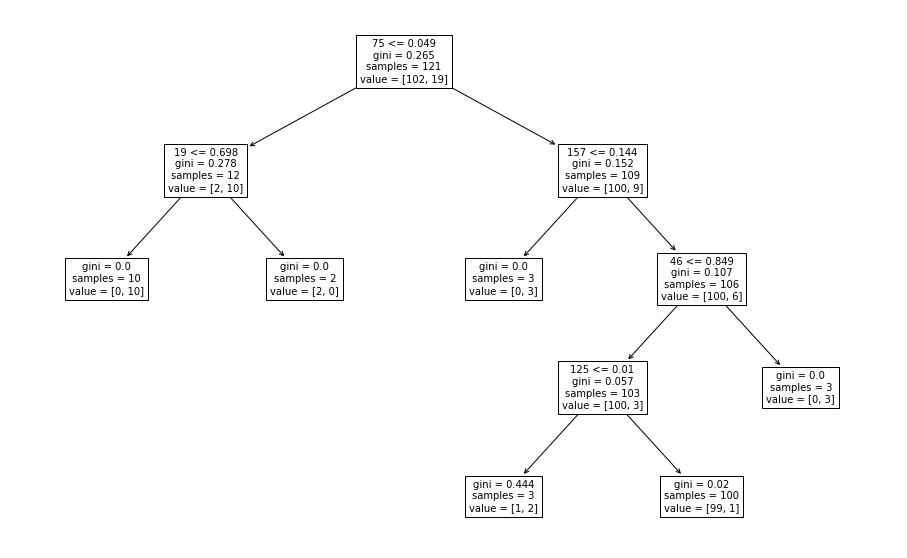

In [ ]:
TreeGraph = tree.plot_tree(classifier, feature_names = time, fontsize = 10, max_depth = 4)
plt.show(TreeGraph)
#sample: 얼마나 많은 훈련 샘플이 적용되었는지
#value: 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 ex)value(남은 전체 기지국, 남은 indoor 기지국)

In [ ]:
for i in Apartment: #주거지역 데이터에서 Apartment 데이터 제거 49개 데이터 -> 45개 데이터
    if i in Residential:
        Residential.remove(i)
    else:
        break

local_use_name = ["Residential", "Commercial", "Apartment"]
local_use = list()
local_use.append(Residential)
local_use.append(Commercial)
local_use.append(Apartment)

In [ ]:
#index가 1~152이고, column이 "지역용도", "test_count", "true_count", "Residential", "Commercial", "Apartment"인 DataFrame 0으로 초기화
array = [[0]*6]*152
result_analysis = pd.DataFrame(array)
result_analysis['id'] = range(1, 153) #기존에 0~151로 되어있던 index를 1~152로 교체. 지역 용도 별 index 역시 여기에 맞춰져 있다.
result_analysis.set_index('id', inplace=True) #id를 index로 사용
result_analysis.columns = ["지역용도", "test_count", "true_count", "Residential", "Commercial", "Apartment"]

#index 별 지역용도 적어주기
for index in range(1, 161):
    for i in range(len(local_use)):
        if index in local_use[i]:
            result_analysis["지역용도"][index] = local_use_name[i]

from sklearn import tree

average_list = list()
target_average_list = list()
nontarget_average_list = list()

for target in range(len(local_use)): #0:주거, 1: 상업, 2: 아파트
    average = 0
    target_average = 0
    nontarget_average = 0
    data_t['SpecificArea'] = data_t.index.isin(local_use[target]) #Data의 index 중 target에 속하는 index를 true로 반환.

    #지역용도 별 100번 반복 시행
    for n in range(100):
        check = False
        sample_num = int(len(data_t)*0.8)
        target_num = len(local_use[target])
        while (check == False):
            random_num = random.randrange(1,100000)
            train_data = data_t.sample(sample_num, replace=False, random_state=random_num) #원래는 random_state=2022 20프로를 train_data로 분류
            test_data = data_t.loc[ ~data_t.index.isin(train_data.index)]
            train_target_num = train_data['SpecificArea'].sum()
            if ((train_target_num >= int(0.7*target_num)) & (train_target_num <= int(0.8*target_num))):
                check = True

        #분류 모델 정의
        classifier = tree.DecisionTreeClassifier(max_depth = 4) #min_samples_split값 중요 초기값: min_samples_split = 2
        #학습에 사용되는 index 설정
        time = []
        for i in range(24*7):
            time.append(i)
        #분류 모델 학습
        classifier.fit(train_data[time], train_data['SpecificArea'])
         #test 데이터 분류
        test_data['pred'] = classifier.predict(test_data[time])

        #test_data의 index를 확인
        for j in range(1, len(result_analysis) + 1):
            if j in test_data.index:
                result_analysis["test_count"][j] += 1
        for j in test_data.index:
            if test_data['pred'][j] == True:
                result_analysis["true_count"][j] += 1
                result_analysis[local_use_name[target]][j] += 1
        
        Indoor_false = 0
        for j in test_data.index:
            if test_data['SpecificArea'][j] and test_data['pred'][j] == False:
                Indoor_false = Indoor_false + 1
        average += (test_data['pred'] == test_data['SpecificArea']).mean()
        target_average += (target_num-train_target_num-Indoor_false) / (target_num - train_target_num) #target_num = train 데이터에 속한 target 데이터 개수, Indoor_false = 지역 용도 데이터 중 잘못 분류된 데이터 개수
        nonIndoor_false = 0
        for j in test_data.index:
            if (test_data['SpecificArea'][j] == False) and (test_data['pred'][j] == True):
                nonIndoor_false += 1
        nontarget_num = len(test_data) - (target_num - train_target_num)
        nontarget_average += (nontarget_num - nonIndoor_false) / nontarget_num
    average_list.append(average / 100)
    target_average_list.append(target_average / 100)
    nontarget_average_list.append(nontarget_average / 100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_analysis["test_count"][j] += 1
<ipython-input-27-31f2ffa1236b>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_analysis["true_count"][j] += 1
<ipython-input-27-31f2ffa1236b>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_analysis[local_use_name[target]][j] += 1
<ipython-input-27-31f2ffa1236b>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [ ]:
pd.set_option('display.max_rows',None)
result_analysis

,지역용도,test_count,true_count,Residential,Commercial,Apartment
id,,,,,,
1,Residential,68,17,8,7,2
2,Residential,73,15,0,15,0
3,Residential,64,11,2,9,0
4,Apartment,44,5,3,0,2
5,Residential,62,8,2,6,0
6,Residential,71,14,13,1,0
7,Residential,67,10,3,2,5
8,Residential,65,13,1,11,1
9,Residential,67,15,2,12,1


In [ ]:
#column이 "지역용도", "Residential", "Commercial", "Apartment"인 DataFrame 0으로 초기화
array = [[0]*4]*1
result_analysis_2 = pd.DataFrame(array) #한 아파트 index가 어느 지역용도로 분리되는지
result_analysis_2.columns = ["지역용도", "Residential", "Commercial", "Apartment"]

for i in Apartment:
    max_value = 0
    max_index = ""
    result_analysis_2["지역용도"] += 1
    for j in local_use_name:
        if max_value < result_analysis[j][i]:
            max_value = result_analysis[j][i]
            max_index = j
    result_analysis_2[max_index] += 1
result_analysis_2

,지역용도,Residential,Commercial,Apartment
0,24,4,4,16


In [ ]:
#column이 "test_count", "true_count", "Residential", "Commercial", "Apartment", "Average"인 DataFrame 0으로 초기화
array = [[0]*6]*1
result_analysis_3 = pd.DataFrame(array) # true_count 대비 어느 비율로 분류가 되었는지
result_analysis_3.columns = ["test_count", "true_count","Residential", "Commercial", "Apartment", "Average"]

In [ ]:
for i in Apartment:
    max_value = 0
    max_index = 0
    result_analysis_3["test_count"] += result_analysis["test_count"][i]
    result_analysis_3["true_count"] += result_analysis["true_count"][i]
    result_analysis_3["Residential"] += result_analysis["Residential"][i]
    result_analysis_3["Commercial"] += result_analysis["Commercial"][i]
    result_analysis_3["Apartment"] += result_analysis["Apartment"][i]
result_analysis_3["Average"] = result_analysis_3["Apartment"] / result_analysis_3["true_count"]

In [ ]:
result_analysis_3

,test_count,true_count,Residential,Commercial,Apartment,Average
0,1508,477,95,118,264,0.553459


In [ ]:
print(len(Residential))
print(len(Commercial))
print(len(Apartment))

45
64
24


In [ ]:
len(test_data)

31

In [ ]:
print(average_list)
print(target_average_list)
print(nontarget_average_list)

[0.5699999999999998, 0.5670967741935482, 0.8319354838709679]
[0.22452214452214447, 0.5047064115794764, 0.4360357142857143]
[0.753012097981138, 0.6255410586145878, 0.9275838907469341]
